In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
gdf = gpd.read_file('/app/data/output/amenities_maps/Resumen')
df_cols = ['Aprovision', 'Entretenim', 'Servicios', 'Comida par', 'Transporte', 'Cuidados', 'Educacion', 'Tiempo Pro']
real_cols = ['Aprovisionamiento', 'Entretenimiento', 'Servicios', 'Comida para servir', 'Transporte publico', 'Salud o Cuidados', 'Educacion', 'Promedio']
traductor = {df_cols[i]: real_cols[i] for i in range(len(df_cols))}
df = gdf[df_cols]
df.rename(columns=traductor, inplace=True)

In [7]:
# Creando un diccionario para almacenar los resultados
summary = {}

# Analizando cada categoría
for col in df.columns:
    summary[col] = {
        "<= 5": df[df[col] <= 5].shape[0],
        "<= 10": df[df[col] <= 10].shape[0],
        "<= 15": df[df[col] <= 15].shape[0],
        "> 15": df[df[col] > 15].shape[0]
    }

# Convirtiendo el resumen en un DataFrame para una presentación más clara
summary_df = pd.DataFrame.from_dict(summary, orient='index')

# Mostrando el resultado
summary_df = 100*summary_df/df.shape[0]

In [8]:
summary_df

,<= 5,<= 10,<= 15,> 15
Aprovisionamiento,30.753354,62.720816,78.771323,21.228677
Entretenimiento,17.143204,41.486068,62.496206,37.503794
Servicios,23.268379,52.795484,75.371821,24.628179
Comida para servir,32.149578,58.635343,75.845323,24.154677
Transporte publico,70.988891,85.673526,90.572452,9.427548
Salud o Cuidados,17.640988,42.014205,65.780368,34.219632
Educacion,46.785649,76.185273,87.919626,12.080374
Promedio,20.724822,61.045347,81.934074,18.065926


In [9]:

# Creando un diccionario para almacenar los resultados de los promedios
average_stats = {}

# Calculando el promedio general y el promedio con valores menores a 15 para cada categoría
for col in df.columns:
    average_stats[col] = {
        "Promedio General": df[col].mean(),
        "Promedio < 15": df[df[col] < 15][col].mean()
    }

# Convirtiendo los resultados en un DataFrame para una presentación más clara
average_stats_df = pd.DataFrame.from_dict(average_stats, orient='index')

# Mostrando el resultado
average_stats_df

,Promedio General,Promedio < 15
Aprovisionamiento,11.855869,6.592380
Entretenimiento,15.386211,7.840956
Servicios,11.979352,7.527411
Comida para servir,12.110512,6.413996
Transporte publico,6.257525,3.290610
Salud o Cuidados,13.958758,8.013241
Educacion,8.730442,5.398011
Promedio,11.468381,7.625655


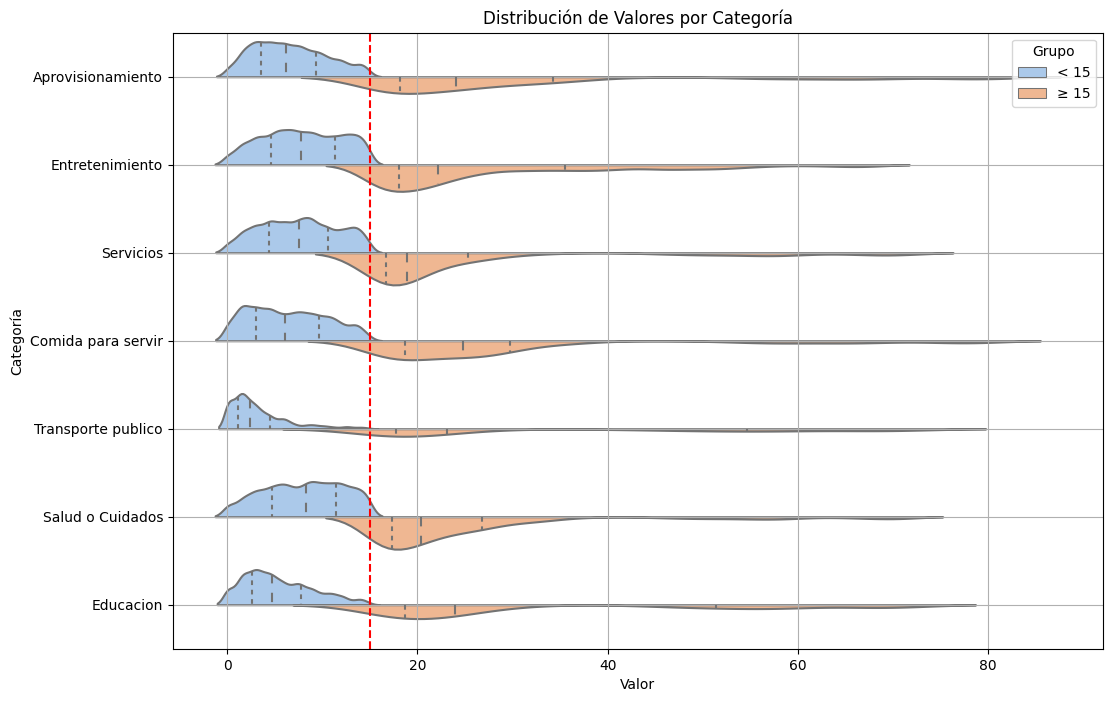

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creando un DataFrame largo para facilitar la visualización
long_df = df.melt(id_vars=[], value_vars=df.columns, var_name='Categoría', value_name='Valor')

# Agregando una columna para indicar si el valor es menor o mayor que 15
long_df['Grupo'] = '≥ 15'
long_df.loc[long_df['Valor'] < 15, 'Grupo'] = '< 15'

# Creando el gráfico de violín
fig, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(x="Valor", y="Categoría", hue="Grupo", data=long_df, split=True, inner="quart", palette="pastel", ax=ax)
plt.axvline(15, color='red', linestyle='--')
plt.grid(True)
plt.title('Distribución de Valores por Categoría')
plt.xlabel('Valor')
plt.ylabel('Categoría')
plt.show()


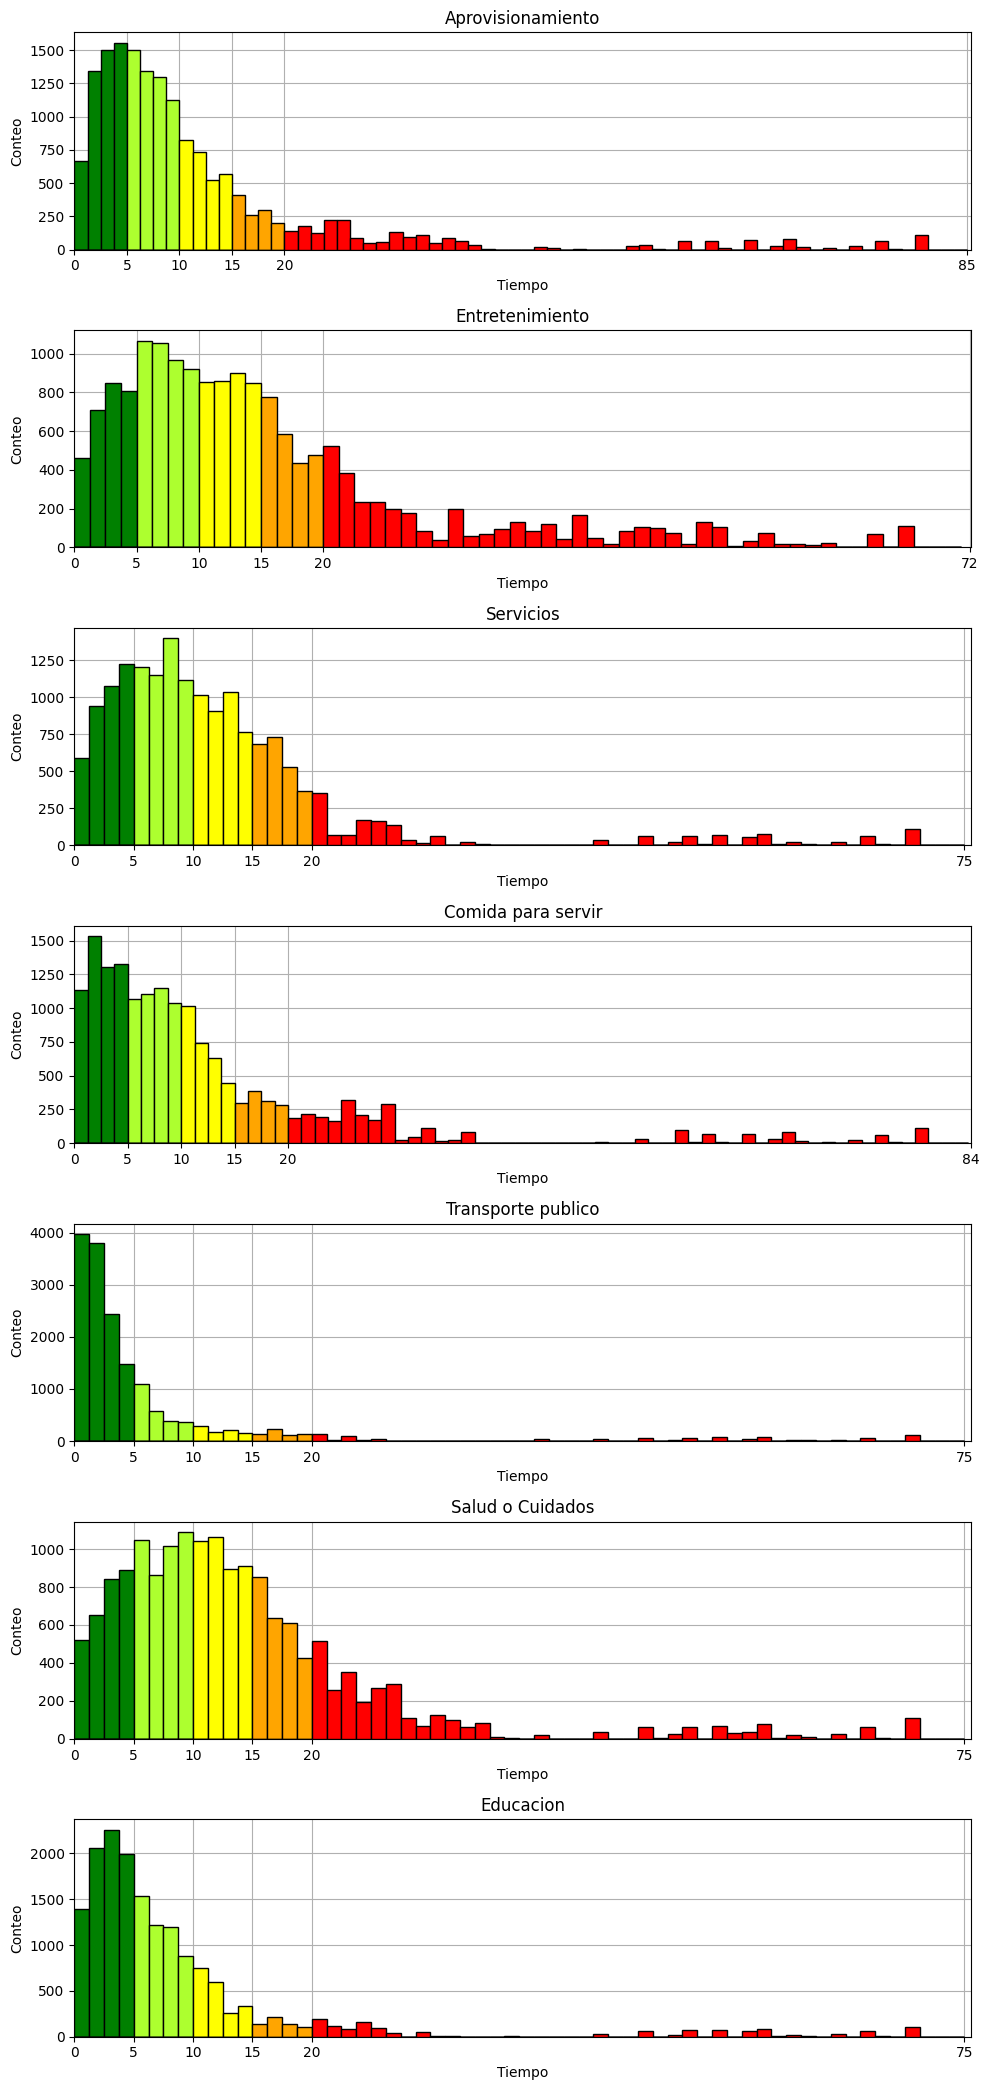

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

columns_to_analyze = df.columns
# Creando subplots
fig, axes = plt.subplots(len(columns_to_analyze), 1, figsize=(10, len(columns_to_analyze) * 3))

total_records = df.shape[0]
# Iterando a través de las categorías y graficando los histogramas
for i, col in enumerate(columns_to_analyze):
    # Definiendo los bins con pasos de 5 en 5
    max_value = df[col].max() + 5
    bins = np.arange(0, max_value, 1.25)

    # Graficando los valores en los diferentes rangos con los colores especificados
    df[(df[col] <= 5)][col].plot(kind='hist', bins=bins, ax=axes[i], color='green', edgecolor='black', zorder=10)
    df[(df[col] > 5) & (df[col] <= 10)][col].plot(kind='hist', bins=bins, ax=axes[i], color='#ADFF2F', edgecolor='black', zorder=10) # Mezcla de verde y amarillo)
    df[(df[col] > 10) & (df[col] <= 15)][col].plot(kind='hist', bins=bins, ax=axes[i], color='yellow', edgecolor='black', zorder=10)
    df[(df[col] > 15) & (df[col] <= 20)][col].plot(kind='hist', bins=bins, ax=axes[i], color='orange', edgecolor='black', zorder=10)
    df[(df[col] > 20)][col].plot(kind='hist', bins=bins, ax=axes[i], color='red', edgecolor='black', zorder=10)

    # Configurando el título y las etiquetas
    axes[i].set_title(col)
    axes[i].set_xlabel('Tiempo')
    axes[i].set_ylabel('Conteo')
    axes[i].grid(1)
    axes[i].set_xticks([0,5,10,15,20,int(max_value)])
    axes[i].set_xlim(0, max_value)

plt.tight_layout()
plt.show()


Axes(0.125,0.11;0.775x0.0939024)
Axes(0.125,0.11;0.775x0.0939024)
Axes(0.125,0.11;0.775x0.0939024)
Axes(0.125,0.11;0.775x0.0939024)
Axes(0.125,0.11;0.775x0.0939024)
Axes(0.125,0.11;0.775x0.0939024)
Axes(0.125,0.11;0.775x0.0939024)


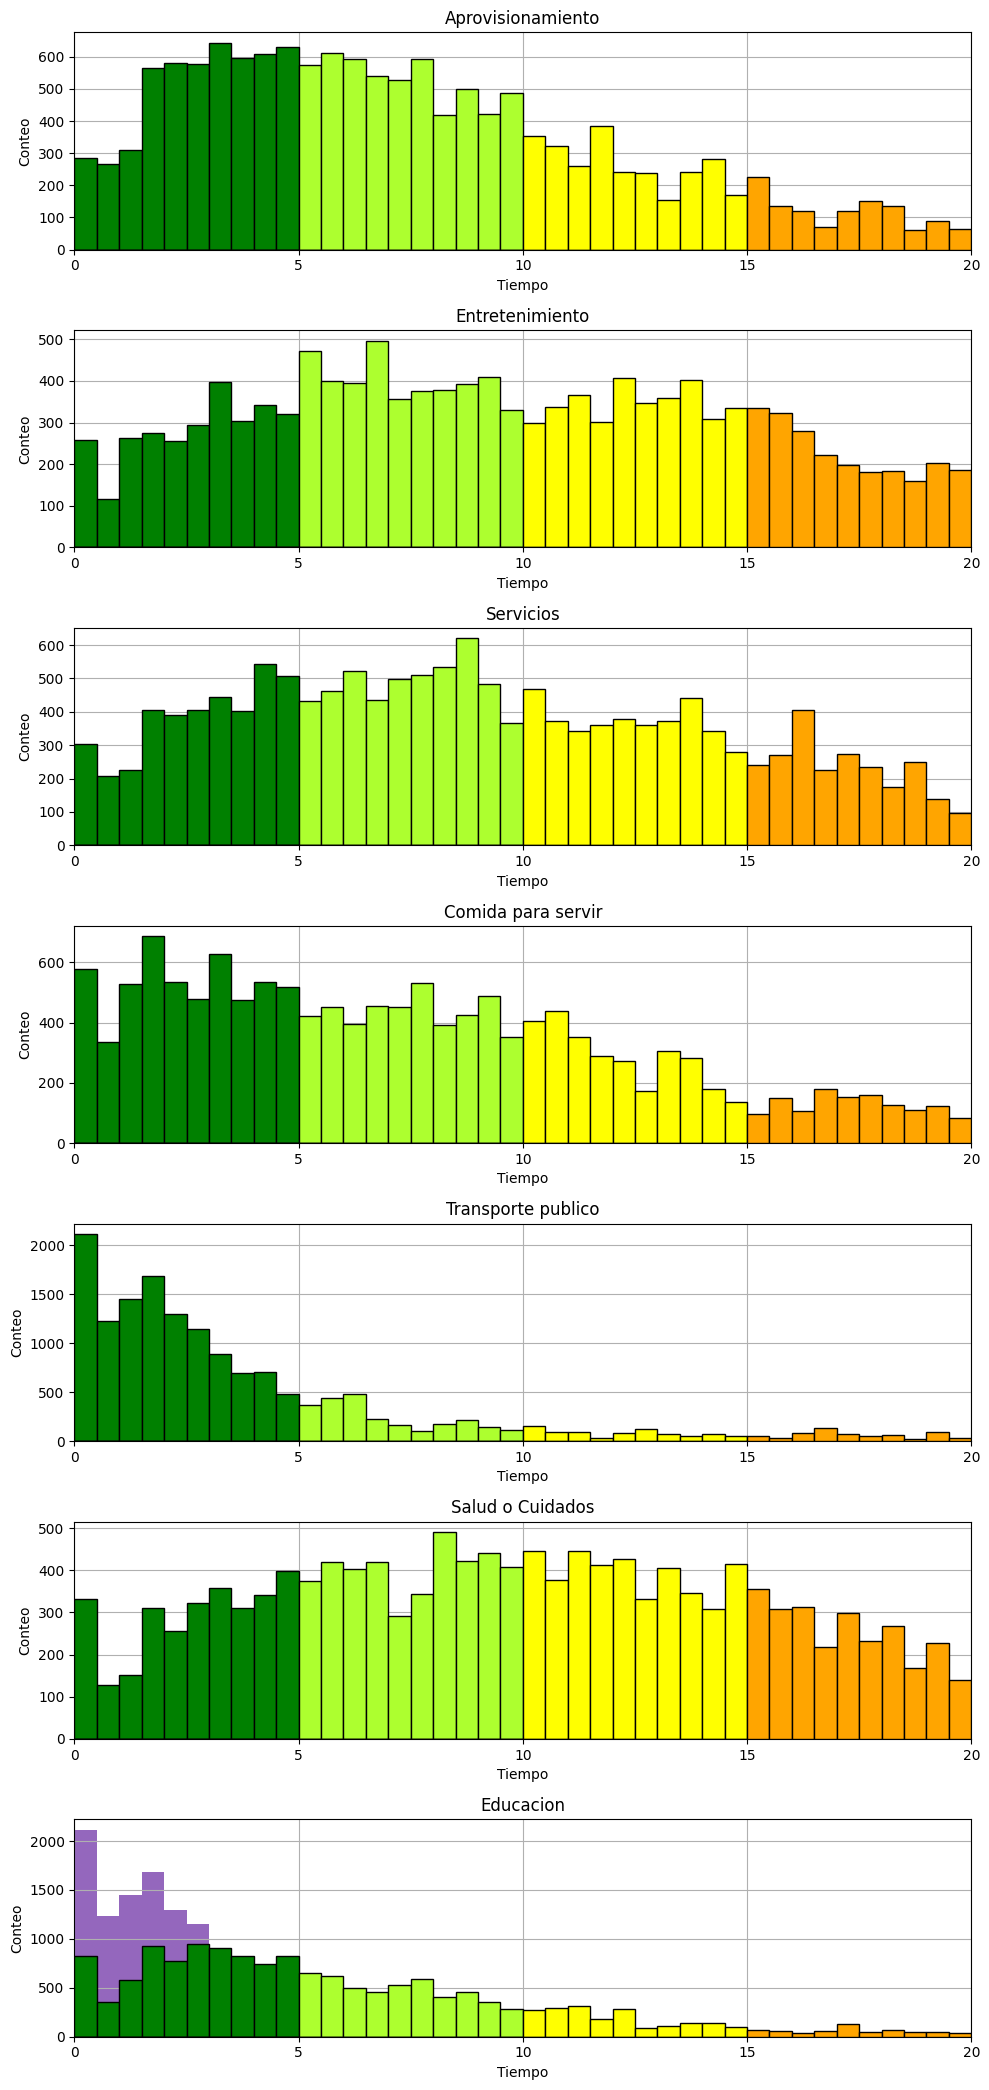

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


columns_to_analyze = df.columns
# Creando subplots
fig, axes = plt.subplots(len(columns_to_analyze), 1, figsize=(10, len(columns_to_analyze) * 3))

total_records = df.shape[0]
# Iterando a través de las categorías y graficando los histogramas
for i, col in enumerate(columns_to_analyze):
    # Definiendo los bins con pasos de 5 en 5
    max_value = df[col].max() + 5
    bins = np.arange(0, max_value, 0.5)

    # Graficando los valores en los diferentes rangos con los colores especificados
    df[(df[col] <= 5)][col].plot(kind='hist', bins=bins, ax=axes[i], color='green', edgecolor='black', zorder=10)
    df[(df[col] > 5) & (df[col] <= 10)][col].plot(kind='hist', bins=bins, ax=axes[i], color='#ADFF2F', edgecolor='black', zorder=10)
    df[(df[col] > 10) & (df[col] <= 15)][col].plot(kind='hist', bins=bins, ax=axes[i], color='yellow', edgecolor='black', zorder=10)
    df[(df[col] > 15) & (df[col] <= 20)][col].plot(kind='hist', bins=bins, ax=axes[i], color='orange', edgecolor='black', zorder=10)

    # Configurando el título y las etiquetas
    axes[i].set_title(col)
    axes[i].set_xlabel('Tiempo')
    axes[i].set_ylabel('Conteo')
    axes[i].grid(1)
    axes[i].set_xticks([0,5,10,15,20])
    axes[i].set_xlim(0, 20)

plt.tight_layout()
plt.show()

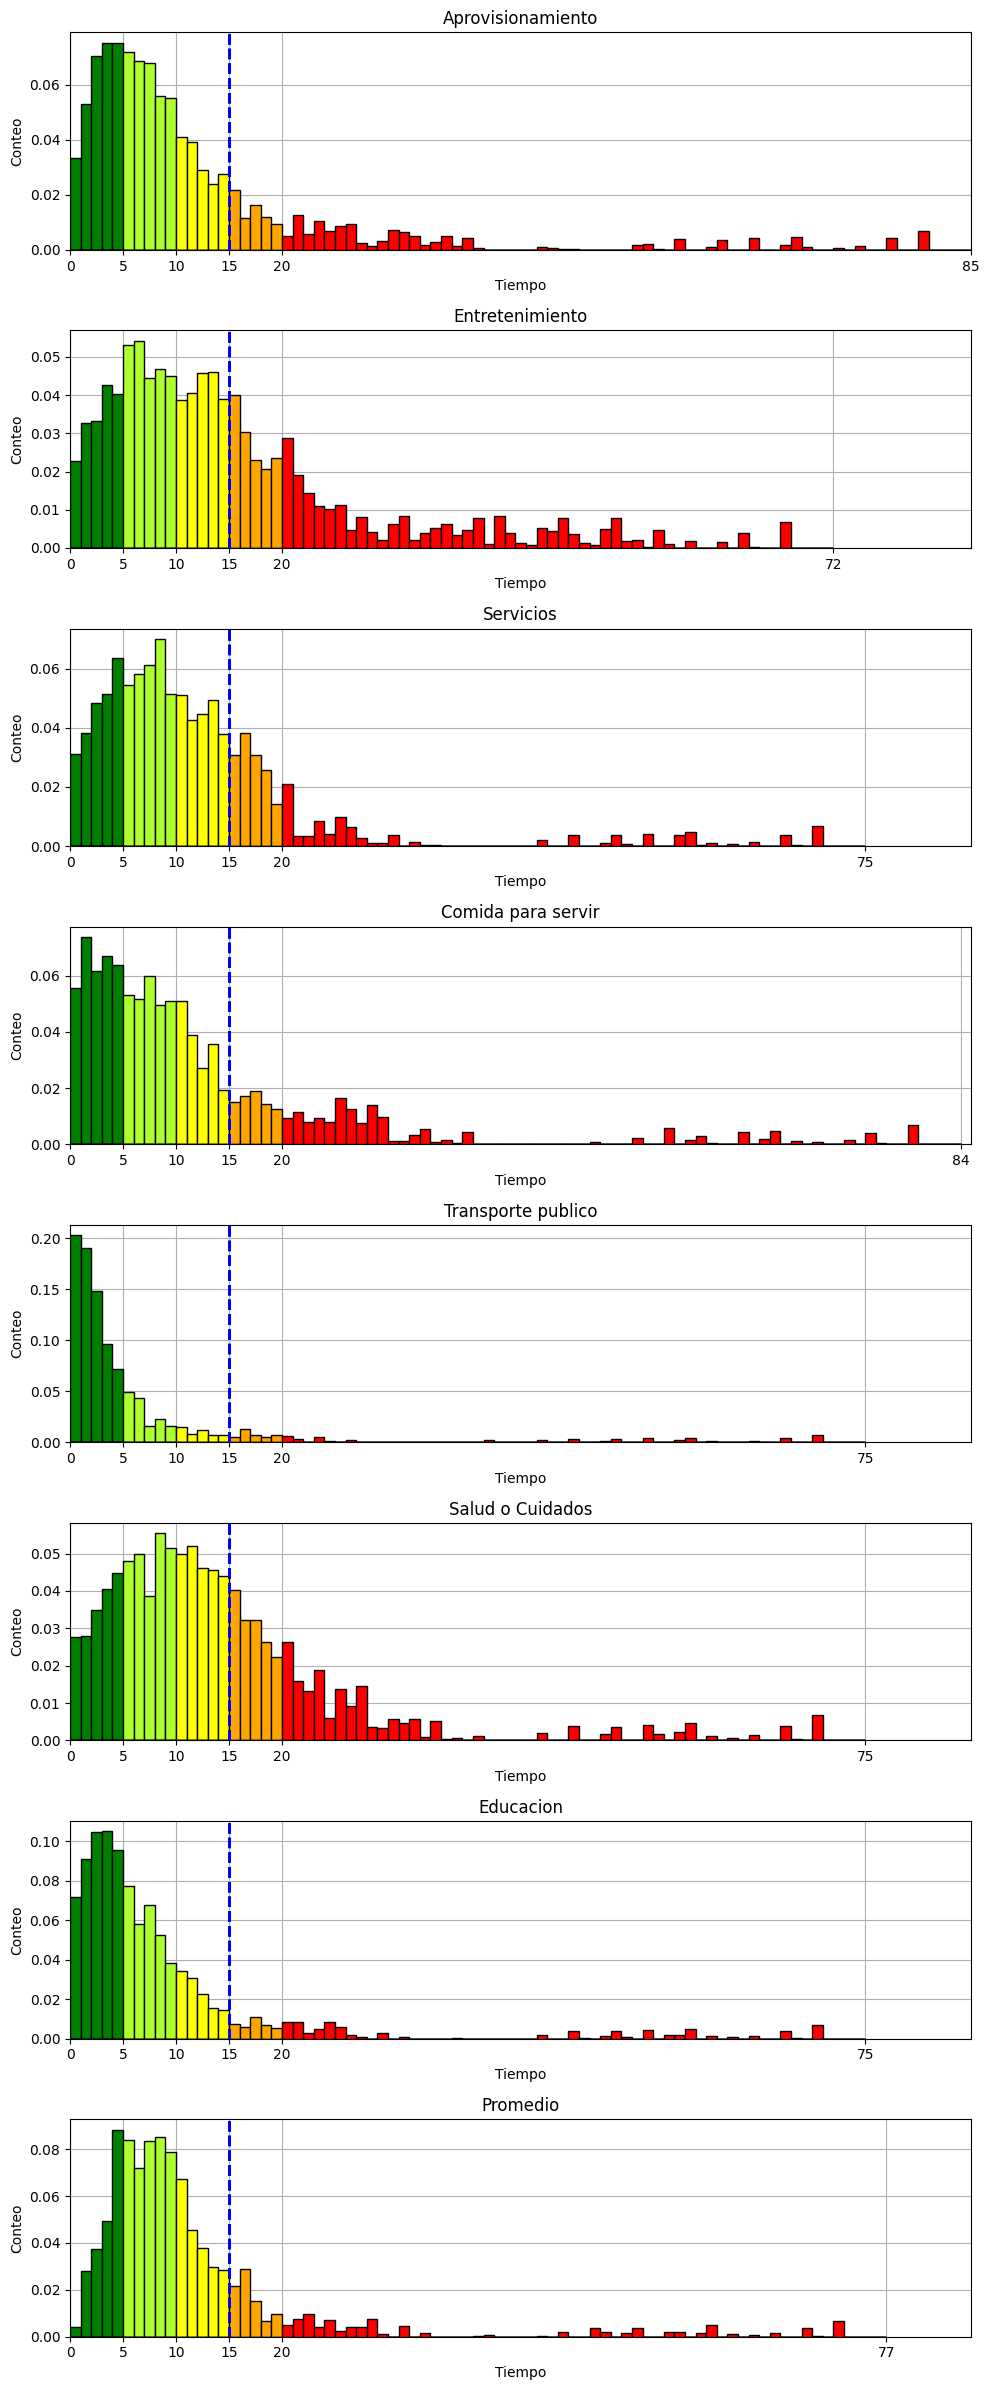

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


columns_to_analyze = df.columns
# Creando subplots
fig, axes = plt.subplots(len(columns_to_analyze), 1, figsize=(10, len(columns_to_analyze) * 3))

total_records = df.shape[0]
# Iterando a través de las categorías y graficando los histogramas
for i, col in enumerate(columns_to_analyze):
    # Definiendo los bins con pasos de 5 en 5
    max_value = df[col].max() + 5
    bins = np.arange(0, max_value, 1)

    data_args = [
        {
            'mask': df[col]<= 5,
            'color': 'green'
        },
        {
            'mask': (df[col] > 5) & (df[col] <= 10),
            'color': '#ADFF2F'
        },
        {
            'mask': (df[col] > 10) & (df[col] <= 15),
            'color': 'yellow'
        },
        {
            'mask': (df[col] > 15) & (df[col] <= 20),
            'color': 'orange'
        },
        {
            'mask': df[col] > 20,
            'color': 'red'
        }
    ]

    for arg in data_args:
        values = df[arg['mask']][col]
        hist_values, bin_edges = np.histogram(values, bins=bins)
        hist_values = hist_values/total_records
        axes[i].bar(bin_edges[:-1]+np.diff(bin_edges)/2, hist_values, width=np.diff(bin_edges), edgecolor='black', facecolor=arg['color'], zorder=10)
        axes[i].axvline(15, linewidth=2, linestyle='--', color='blue', zorder=15)

    # Configurando el título y las etiquetas
    axes[i].set_title(col)
    axes[i].set_xlabel('Tiempo')
    axes[i].set_ylabel('Conteo')
    axes[i].grid(1)
    axes[i].set_xticks([0,5,10,15,20,int(max_value)])
    axes[i].set_xlim(0, 85)

plt.tight_layout()
plt.savefig('/app/data/output/amenities_maps/dist_tiempos_categorias.png')
# plt.show()


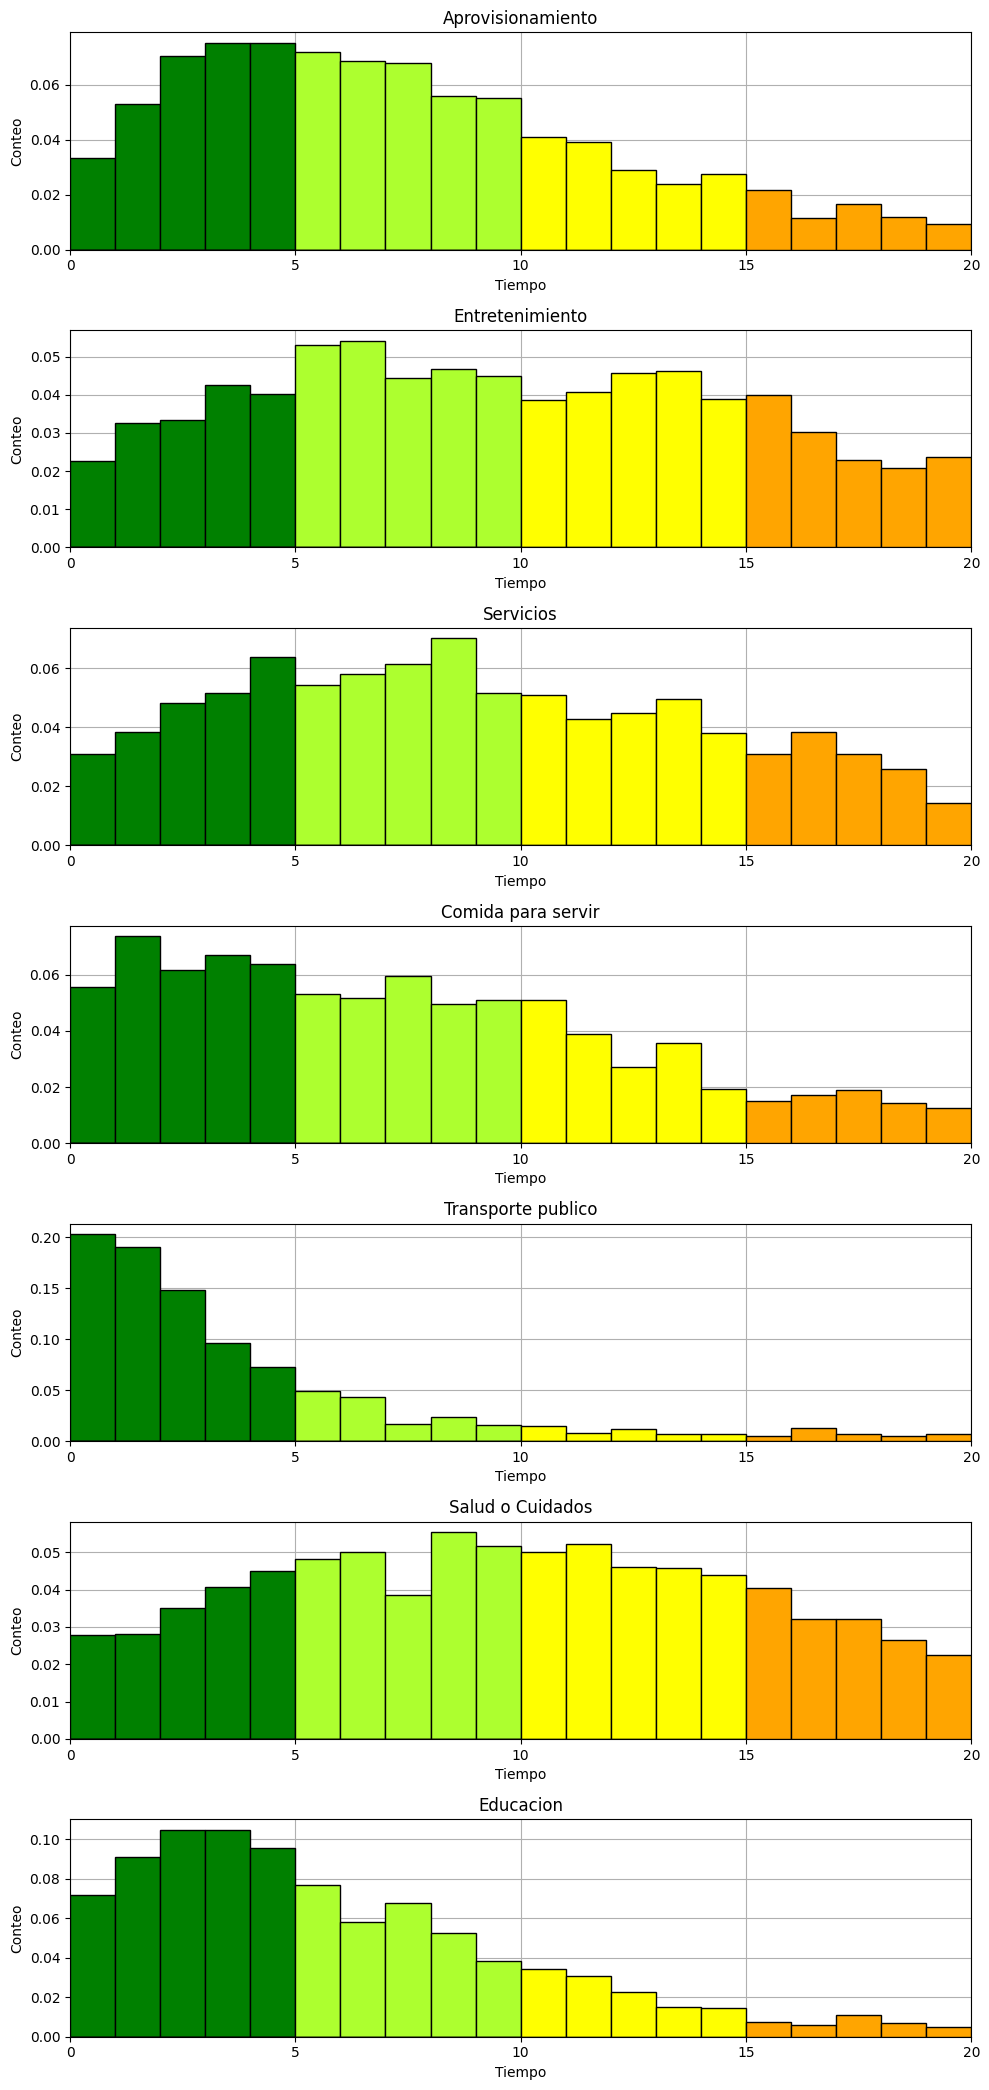

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


columns_to_analyze = df.columns
# Creando subplots
fig, axes = plt.subplots(len(columns_to_analyze), 1, figsize=(10, len(columns_to_analyze) * 3))

total_records = df.shape[0]
# Iterando a través de las categorías y graficando los histogramas
for i, col in enumerate(columns_to_analyze):
    # Definiendo los bins con pasos de 5 en 5
    max_value = df[col].max() + 5
    bins = np.arange(0, max_value, 1)

    data_args = [
        {
            'mask': df[col]<= 5,
            'color': 'green'
        },
        {
            'mask': (df[col] > 5) & (df[col] <= 10),
            'color': '#ADFF2F'
        },
        {
            'mask': (df[col] > 10) & (df[col] <= 15),
            'color': 'yellow'
        },
        {
            'mask': (df[col] > 15) & (df[col] <= 20),
            'color': 'orange'
        },
    ]

    for arg in data_args:
        values = df[arg['mask']][col]
        hist_values, bin_edges = np.histogram(values, bins=bins)
        hist_values = hist_values/total_records
        axes[i].bar(bin_edges[:-1]+np.diff(bin_edges)/2, hist_values, width=np.diff(bin_edges), edgecolor='black', facecolor=arg['color'], zorder=10)

    # Configurando el título y las etiquetas
    axes[i].set_title(col)
    axes[i].set_xlabel('Tiempo')
    axes[i].set_ylabel('Conteo')
    axes[i].grid(1)
    axes[i].set_xticks([0,5,10,15,20])
    axes[i].set_xlim(0, 20)

plt.tight_layout()
plt.show()


['Aprovisionamiento', 'Entretenimiento', 'Servicios', 'Comida para servir', 'Transporte publico', 'Salud o Cuidados', 'Educacion']


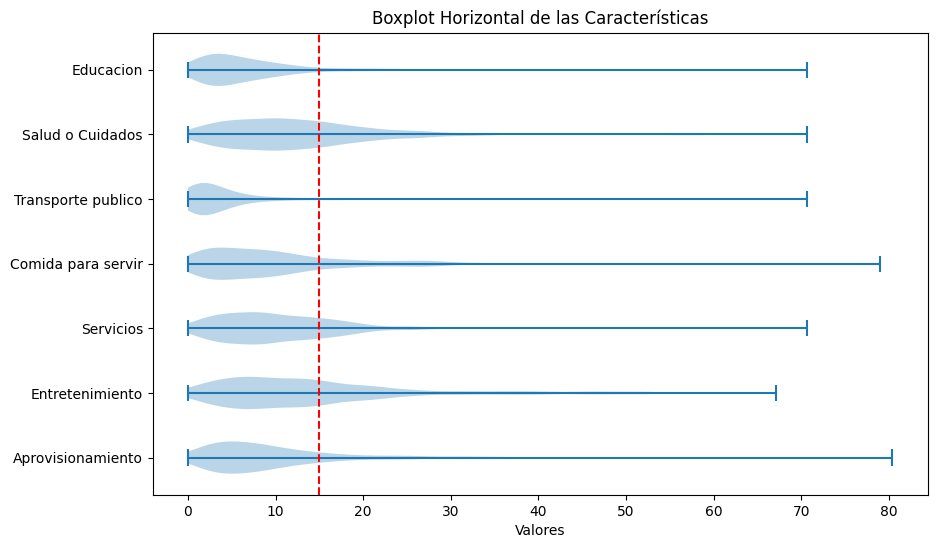

In [5]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))  # Puedes ajustar el tamaño de la figura según tus necesidades

# Definir los datos y nombres de las columnas
datos = df.values
nombres_columnas = df.columns.tolist()
print(nombres_columnas)

# Graficar el boxplot horizontal
ax.violinplot(datos, vert=False)
plt.axvline(15, color='red', linestyle='--')

# Ajustar los ticks y las etiquetas del eje y
ax.set_yticks(range(1, len(nombres_columnas)+1))  # Empieza en 1 y termina en el número de columnas
ax.set_yticklabels(nombres_columnas)

# Agregar título y etiquetas a los ejes
ax.set_title('Boxplot Horizontal de las Características')
ax.set_xlabel('Valores')

# Mostrar la gráfica
plt.show()

In [7]:
df = gdf[gdf['Tiempo Pro']<=15]
df = df[df_cols].rename(columns=traductor)

['Aprovisionamiento', 'Entretenimiento', 'Servicios', 'Comida para servir', 'Transporte publico', 'Salud o Cuidados', 'Educacion']


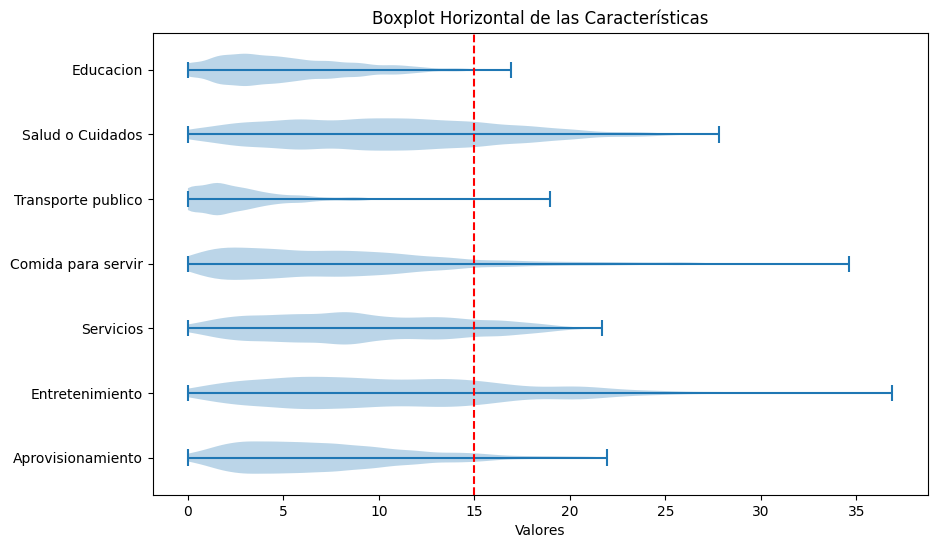

In [8]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))  # Puedes ajustar el tamaño de la figura según tus necesidades

# Definir los datos y nombres de las columnas
datos = df.values
nombres_columnas = df.columns.tolist()
print(nombres_columnas)

# Graficar el boxplot horizontal
ax.violinplot(datos, vert=False)
plt.axvline(15, color='red', linestyle='--')

# Ajustar los ticks y las etiquetas del eje y
ax.set_yticks(range(1, len(nombres_columnas)+1))  # Empieza en 1 y termina en el número de columnas
ax.set_yticklabels(nombres_columnas)

# Agregar título y etiquetas a los ejes
ax.set_title('Boxplot Horizontal de las Características')
ax.set_xlabel('Valores')

# Mostrar la gráfica
plt.show()